In [1]:
#read train data
import pandas as pd
original_train_data = pd.read_csv('../original_data/train_X.csv')
original_train_label = pd.read_csv('../original_data/train_y.csv')



c:\Users\Steven\anaconda3\envs\datamining\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\Steven\anaconda3\envs\datamining\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
c:\Users\Steven\anaconda3\envs\datamining\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [1]:
import xgboost
import shap

# train an XGBoost model
X, y = shap.datasets.boston()
model = xgboost.XGBRegressor().fit(X, y)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])
# visualize the first prediction's explanation with a force plot
shap.plots.force(shap_values)
# create a dependence scatter plot to show the effect of a single feature across the whole dataset
shap.plots.scatter(shap_values[:,"RM"], color=shap_values)
# summarize the effects of all the features
shap.plots.beeswarm(shap_values)
# Bar Chart
shap.plots.bar(shap_values)

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


AttributeError: module 'shap.datasets' has no attribute 'boston'

In [5]:
print(original_train_data.describe())

        encounter_id     patient_id   hospital_id           age           bmi  \
count   44939.000000   44939.000000  44939.000000  42874.000000  43288.000000   
mean    65642.668751   65491.091346    105.732460     62.318701     29.195878   
std     37736.732171   37696.448956     62.901289     16.804263      8.263748   
min         1.000000       1.000000      2.000000     16.000000     14.844926   
25%     33059.000000   32732.000000     47.000000     52.000000     23.638493   
50%     65732.000000   65467.000000    109.000000     65.000000     27.680158   
75%     98239.500000   98089.500000    161.000000     75.000000     32.962064   
max    131049.000000  131049.000000    204.000000     89.000000     67.814990   

       elective_surgery        height        icu_id  pre_icu_los_days  \
count      44939.000000  44308.000000  44939.000000      44939.000000   
mean           0.182314    169.565517    509.502659          0.836469   
std            0.386107     10.788113    228.631369

encounter_id                      0
patient_id                        0
hospital_id                       0
age                            2065
bmi                            1651
                               ... 
leukemia                        346
lymphoma                        346
solid_tumor_with_metastasis     346
apache_3j_bodysystem            807
apache_2_bodysystem             807
Length: 83, dtype: int64


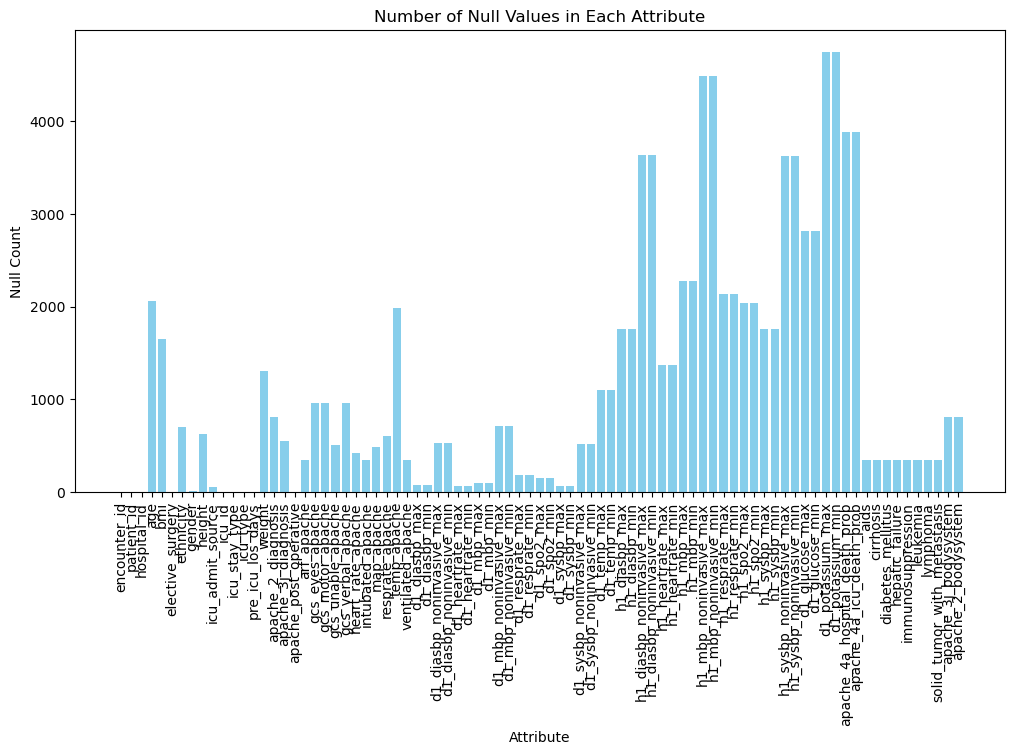

In [28]:
#count the row number that has null value
null_counts_per_row = original_train_data.isnull().sum(axis=0)
print(null_counts_per_row)
#draw the histogram of each row's count that has null value
ull_counts_df = pd.DataFrame({'Attribute': null_counts_per_row.index, 'NullCount': null_counts_per_row.values})
import matplotlib.pyplot as plt
null_counts_df = pd.DataFrame({'Attribute': null_counts_per_row.index, 'NullCount': null_counts_per_row.values})
plt.figure(figsize=(12, 6))
plt.bar(null_counts_df['Attribute'], null_counts_df['NullCount'], color='skyblue')
plt.xticks(rotation=90)
plt.title('Number of Null Values in Each Attribute')
plt.xlabel('Attribute')
plt.ylabel('Null Count')
plt.show()

In [ ]:
#save null_count_row to csv file
null_counts_df.to_csv('null_counts_per_row.csv', index=False)

c:\Users\Steven\anaconda3\envs\datamining\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Steven\anaconda3\envs\datamining\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Steven\anaconda3\envs\datamining\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


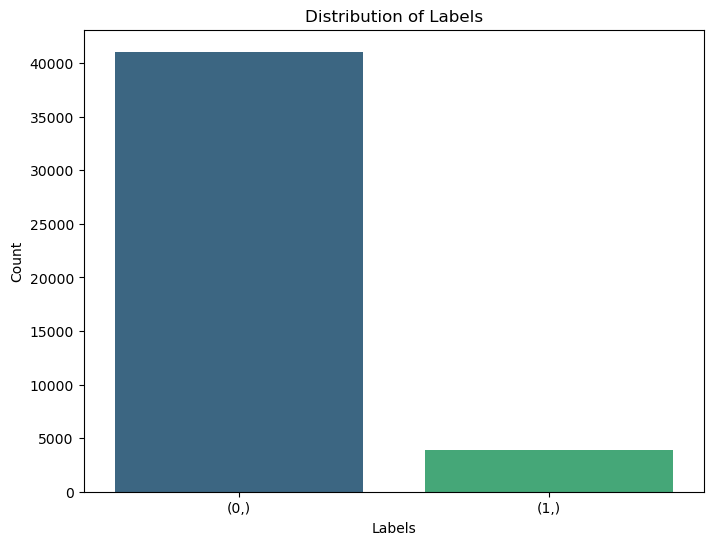

In [36]:
import seaborn as sns
original_train_label.value_counts()
label_counts_df = pd.DataFrame({'Label': original_train_label.value_counts().index, 'Count': original_train_label.value_counts().values})
plt.figure(figsize=(8, 6))
sns.barplot(x='Label', y='Count', data=label_counts_df, palette='viridis')
plt.title('Distribution of Labels')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()

In [6]:
test_data.value_counts()

has_died
0           41061
1            3878
Name: count, dtype: int64